In [13]:
import psycopg2 as ps
import psycopg2.extras as e
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [15]:

PATH_SPLIT_DATA='/Users/piushagullapalli/Documents/Spring_22/645/Project/seeDb/seeDB/Data/splits'

def split_data(splits):
    data_raw = pd.read_csv(r'/Users/piushagullapalli/Documents/Spring_22/645/Project/seeDb/seeDB/Data/adult.data.txt')
    data_split = np.array_split(data_raw, splits)
    for k in range(1, len(data_split)+1):
        data_split[k-1].to_csv(os.path.join(PATH_SPLIT_DATA ,"split_{}.csv".format(k)),encoding='utf-8', index=False)

split_data(10)

In [16]:
# connect to database
con = ps.connect("dbname='piushagullapalli' user='piushagullapalli' host='localhost' password=''")
curs = con.cursor()

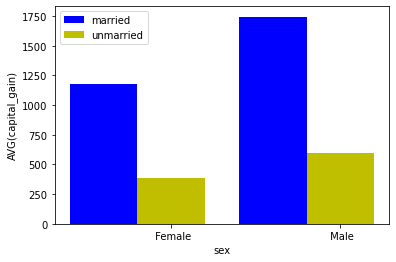

In [38]:
curs.execute("""create or replace view married as 
                   select * from census where marital_status in (' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',' Separated');
           create or replace view unmarried as 
                   select * from census where marital_status in (' Never-married', ' Widowed',' Divorced');""")
con.commit()

curs.execute("SELECT sex, avg(capital_gain) FROM married GROUP BY sex;")
target = curs.fetchall()

curs.execute("SELECT sex, avg(capital_gain) FROM unmarried GROUP BY sex;")
reference = curs.fetchall()

def create_plot(afm, reference, target):
    group_attr,function, measure = afm
    plt.subplots()
    graph1 = plt.bar(np.arange(len(target)), target.values(), 0.4, color = 'b', label = 'married')
    graph2 = plt.bar(np.arange(len(target))+0.4, reference.values(), 0.4, color = 'y', label = 'unmarried')
    
    plt.xlabel('{}'.format(group_attr))
    plt.ylabel('{}({})'.format(function, measure))
    plt.xticks(np.arange(len(target))+0.4, target.keys())
    plt.legend()

    plt.show()

afm_plot = ('sex', 'AVG', 'capital_gain')
create_plot(afm_plot, dict(reference), dict(target))